In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
file_path = '/content/sample_data/SuperStore Sales DataSet.csv'
df = pd.read_csv(file_path)

In [8]:
print(df.head())

   Row ID+O6G3A1:R6        Order ID Order Date   Ship Date  Delivery Time  \
0                 1  CA-2019-152156  11/8/2019  11/11/2019              3   
1                 2  CA-2019-152156  11/8/2019  11/11/2019              3   
2                 3  CA-2019-138688  6/12/2019   6/16/2019              4   
3                13  CA-2020-114412  4/15/2020   4/20/2020              5   
4                14  CA-2019-161389  12/5/2019  12/10/2019              5   

        Ship Mode Customer ID    Customer Name    Segment        Country  ...  \
0    Second Class    CG-12520      Claire Gute   Consumer  United States  ...   
1    Second Class    CG-12520      Claire Gute   Consumer  United States  ...   
2    Second Class    DV-13045  Darrin Van Huff  Corporate  United States  ...   
3  Standard Class    AA-10480     Andrew Allen   Consumer  United States  ...   
4  Standard Class    IM-15070     Irene Maddox   Consumer  United States  ...   

          Category Sub-Category  \
0        Furnit

In [9]:
# Data Cleaning
df.drop(columns=['ind1', 'ind2'], inplace=True)
df['Returns'].fillna(0, inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

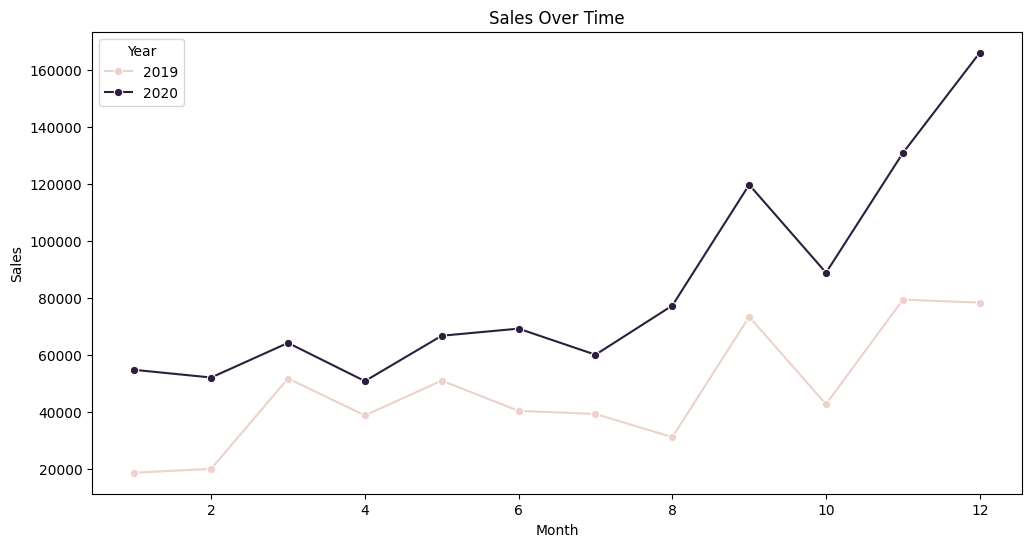

In [10]:
# Sales Over Time
sales_by_year_month = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year_month, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

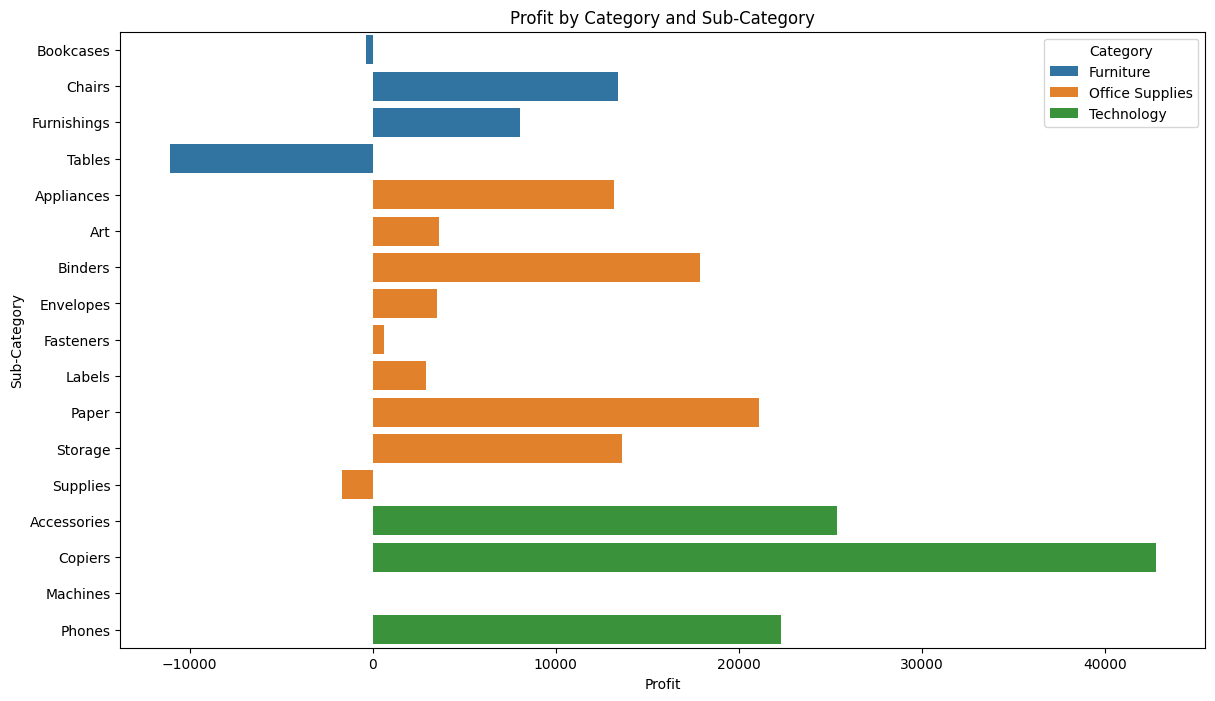

In [11]:
# Profit by Category and Sub-Category
profit_by_category = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=profit_by_category, x='Profit', y='Sub-Category', hue='Category')
plt.title('Profit by Category and Sub-Category')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.show()

<ipython-input-12-954155644e65>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Sales', y='Customer Name', palette='viridis')


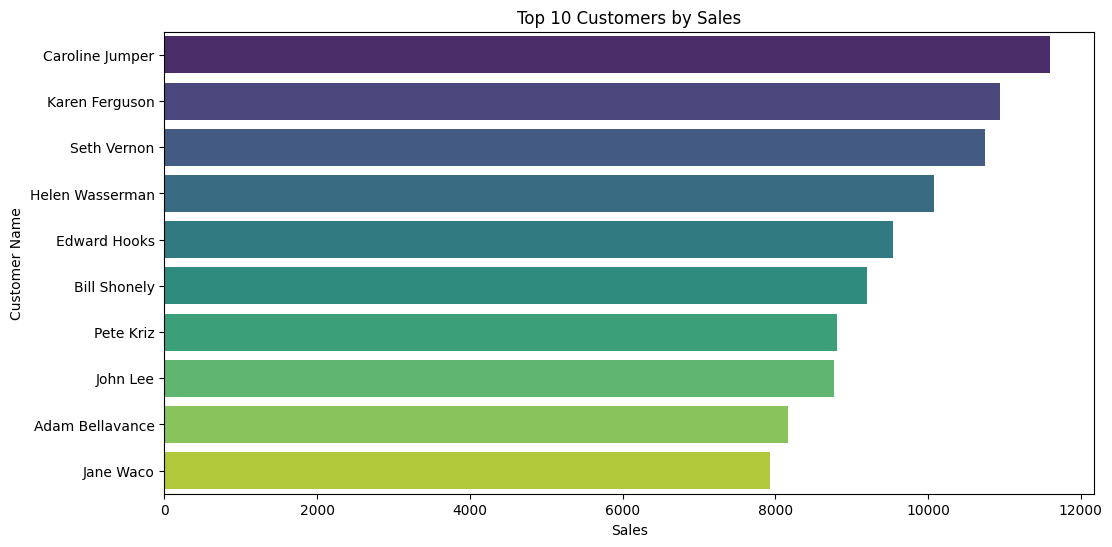

In [12]:
# Top 10 Customers by Sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='Sales', y='Customer Name', palette='viridis')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer Name')
plt.show()

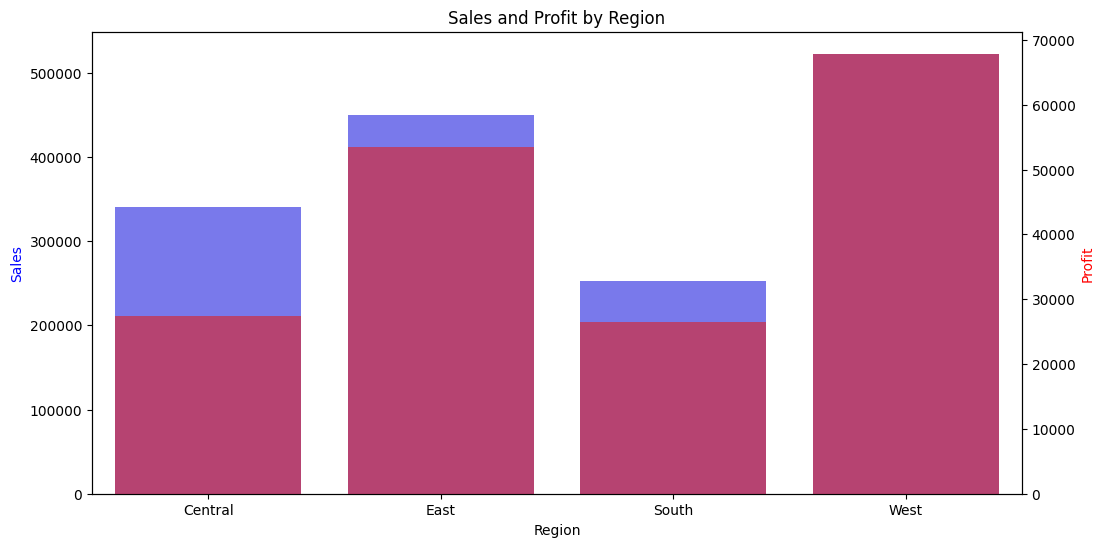

In [13]:
# Sales and Profit by Region
sales_profit_by_region = df.groupby(['Region'])[['Sales', 'Profit']].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
sns.barplot(data=sales_profit_by_region, x='Region', y='Sales', ax=ax1, color='b', alpha=0.6)
sns.barplot(data=sales_profit_by_region, x='Region', y='Profit', ax=ax2, color='r', alpha=0.6)

ax1.set_ylabel('Sales', color='b')
ax2.set_ylabel('Profit', color='r')
ax1.set_title('Sales and Profit by Region')
plt.show()

<ipython-input-14-b6399a9f6bc8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delivery_time_by_ship_mode, x='Ship Mode', y='Delivery Time', palette='magma')


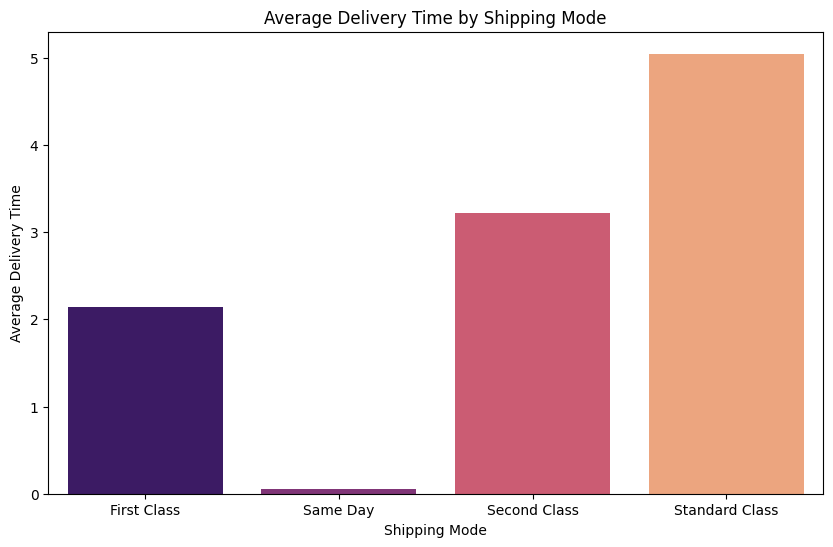

In [14]:
# Shipping Mode and Delivery Time Analysis
delivery_time_by_ship_mode = df.groupby('Ship Mode')['Delivery Time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=delivery_time_by_ship_mode, x='Ship Mode', y='Delivery Time', palette='magma')
plt.title('Average Delivery Time by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Delivery Time')
plt.show()

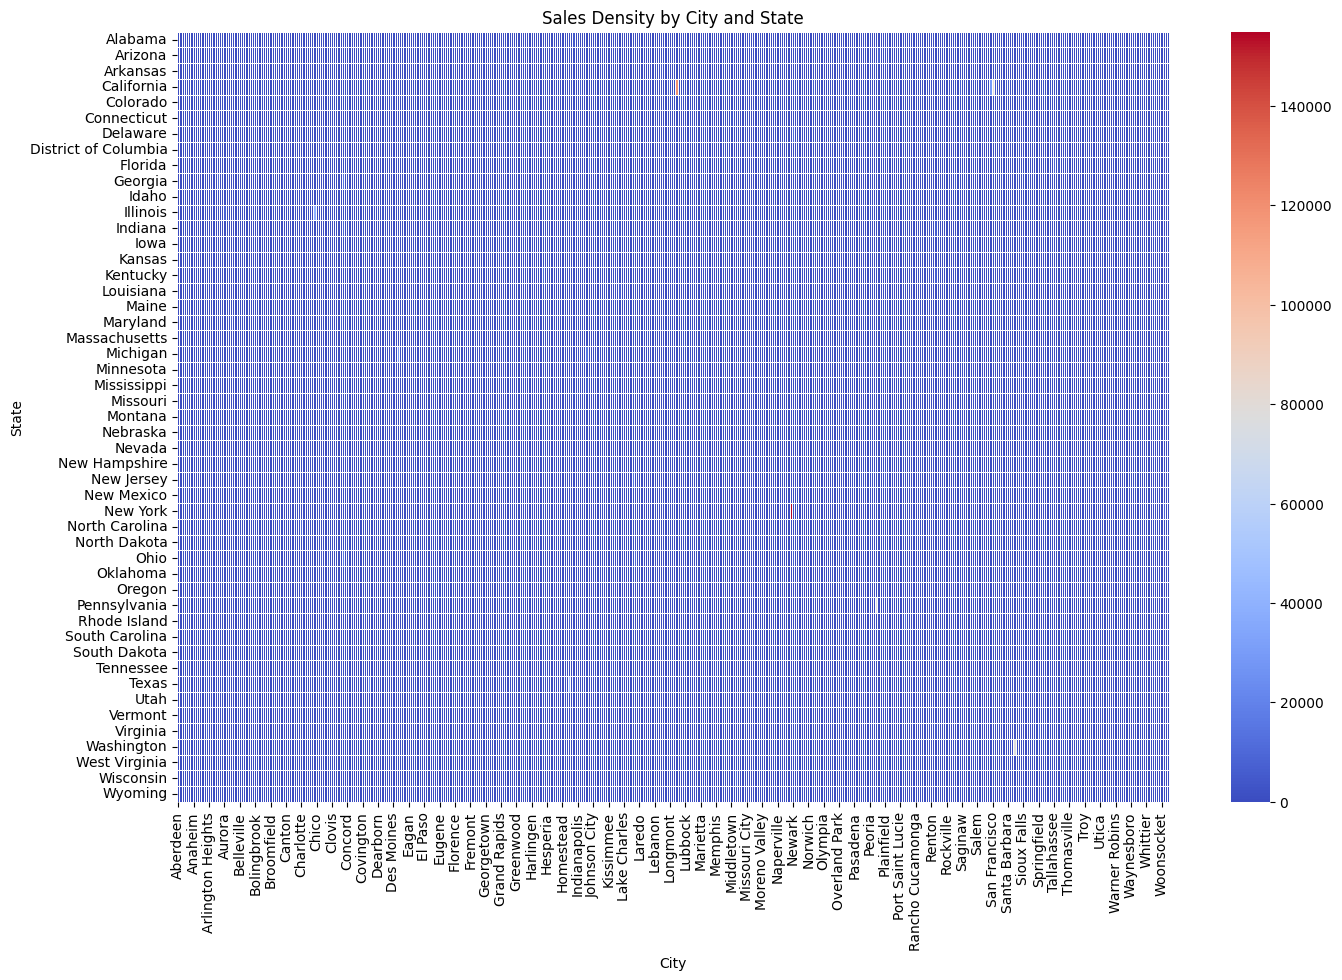

In [15]:
# Sales Density by City and State (Heatmap)
sales_by_state_city = df.groupby(['State', 'City'])['Sales'].sum().unstack().fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(sales_by_state_city, cmap='coolwarm', linewidths=0.5)
plt.title('Sales Density by City and State')
plt.xlabel('City')
plt.ylabel('State')
plt.show()